In [51]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [52]:
df = pd.read_csv('Encuesta_Pobreza.csv')

In [53]:
df.columns

Index(['Unnamed: 0', 'nombre_departamento', 'nombre_municipio',
       'nombre_lugar_poblado', 'cod_familia', 'fecha_nacimiento', 'sexo',
       'nucleo', 'estado_conyugal', 'discapacidad_permanente',
       'sabe_leer_escribir', 'asistencia_centro_educativo',
       'razon_dejo_asistir', 'nivel_inscrito', 'nivel_aprobado',
       'categoria_ocupacional', 'grupo_etnico', 'es_jefe_familia', 'edad'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   996 non-null    int64  
 1   nombre_departamento          996 non-null    object 
 2   nombre_municipio             996 non-null    object 
 3   nombre_lugar_poblado         996 non-null    object 
 4   cod_familia                  996 non-null    float64
 5   fecha_nacimiento             996 non-null    object 
 6   sexo                         996 non-null    object 
 7   nucleo                       996 non-null    float64
 8   estado_conyugal              996 non-null    object 
 9   discapacidad_permanente      2 non-null      object 
 10  sabe_leer_escribir           831 non-null    object 
 11  asistencia_centro_educativo  831 non-null    object 
 12  razon_dejo_asistir           341 non-null    object 
 13  nivel_inscrito      

In [55]:
df['discapacidad_permanente'] = df['discapacidad_permanente'].fillna("No")


In [56]:
df['discapacidad_permanente']


0      No
1      No
2      No
3      No
4      No
       ..
991    No
992    No
993    No
994    No
995    No
Name: discapacidad_permanente, Length: 996, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Unnamed: 0                   996 non-null    int64   
 1   nombre_departamento          996 non-null    category
 2   nombre_municipio             996 non-null    category
 3   nombre_lugar_poblado         996 non-null    category
 4   cod_familia                  996 non-null    float64 
 5   fecha_nacimiento             996 non-null    object  
 6   sexo                         996 non-null    category
 7   nucleo                       996 non-null    float64 
 8   estado_conyugal              996 non-null    category
 9   discapacidad_permanente      996 non-null    category
 10  sabe_leer_escribir           831 non-null    category
 11  asistencia_centro_educativo  831 non-null    category
 12  razon_dejo_asistir           341 non-null    category
 13  nivel

In [57]:
df1 = df.drop(columns=['fecha_nacimiento', 'Unnamed: 0'])

In [58]:
var_drop = ['sexo', 'discapacidad_permanente', 'sabe_leer_escribir', 'asistencia_centro_educativo', 'es_jefe_familia']
var_nodrop = ['nombre_departamento', 'estado_conyugal','razon_dejo_asistir', 'nivel_inscrito', 'nivel_aprobado', 'categoria_ocupacional', 'grupo_etnico']
other_var = ['edad']

df_con_dum = pd.get_dummies(df1[var_nodrop], columns=var_nodrop, drop_first=False).join(pd.get_dummies(df1[var_drop], columns=var_drop, drop_first=True)).join(df1[other_var])

In [59]:
df_con_dum

,nombre_departamento_HUEHUETENANGO,nombre_departamento_QUICHE,nombre_departamento_SAN MARCOS,nombre_departamento_SOLOLA,nombre_departamento_TOTONICAPAN,estado_conyugal_Casado,estado_conyugal_Menor de edad,estado_conyugal_Separado(a) de matrimonio,estado_conyugal_Separado(a) de union,estado_conyugal_Soltero(a),...,grupo_etnico_Mam,grupo_etnico_No indigena,grupo_etnico_Qanjobal,grupo_etnico_Tzutujil,sexo_Mujer,discapacidad_permanente_Una o las dos piernas,sabe_leer_escribir_Si,asistencia_centro_educativo_Si,es_jefe_familia_Si,edad
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,60
1,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,1,0,19
2,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,45
3,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,1,0,18
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,1,0,17
992,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,19
993,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,16
994,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,13


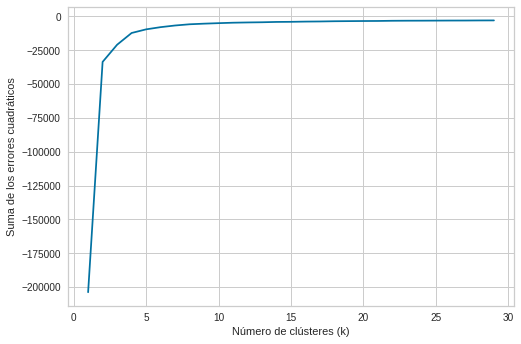

In [61]:
# Se simulan 10 modelos con diferentes k de 1 hasta 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

# Se calcula la inercia de cada uno
inertias = [model.inertia_ for model in kmeans_per_k]

# Se grafican los resultados
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [65]:
kmeans = KMeans(n_clusters=3).fit(df_con_dum)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.17326057e-01  3.13778990e-02  3.95634379e-01  2.15552524e-01
   2.40109141e-01  2.08166817e-16  4.01091405e-01 -3.12250226e-17
  -6.76542156e-17  5.98908595e-01 -1.52655666e-16 -1.56125113e-17
   1.36425648e-03  2.86493861e-02 -1.56125113e-17  1.36425648e-02
   1.36425648e-03  1.73472348e-17  6.00272851e-02  1.36425648e-03
   9.27694407e-02  3.31514325e-01  9.27694407e-02  2.18281037e-02
   9.68622101e-02  7.63983629e-02  1.36425648e-02  9.68622101e-02
   8.18553888e-02  1.36425648e-03  9.41336971e-02  7.63983629e-02
   3.79263302e-01  9.41336971e-02 -7.80625564e-18  1.36425648e-02
   9.68622101e-02  8.45839018e-02  1.36425648e-03  9.41336971e-02
   6.13915416e-02 -1.69135539e-17  9.82264666e-02 -1.11022302e-16
  -1.17961196e-16 -7.35522754e-16 -7.80625564e-18  9.54979536e-03
   2.72851296e-03  1.02319236e-01  3.24693042e-01  2.52387449e-01
   2.46930423e-01  1.36425648e-03  6.00272851e-02  4.95225102e-01
   1.36425648e-03  6.18008186e-01  6.68485675e-01  1.52655666e-16
   1.33356

In [73]:
labels = kmeans.predict(df_con_dum)
df1['label'] = labels
df1

,nombre_departamento,nombre_municipio,nombre_lugar_poblado,cod_familia,sexo,nucleo,estado_conyugal,discapacidad_permanente,sabe_leer_escribir,asistencia_centro_educativo,razon_dejo_asistir,nivel_inscrito,nivel_aprobado,categoria_ocupacional,grupo_etnico,es_jefe_familia,edad,label
0,SAN MARCOS,SAN PABLO,BARRANCA HONDA,609497670.0,Mujer,1.0,Casado,No,No,No,No le interesa,Ninguno,Ninguno,Trabajador(a) cuenta propia agricola,No indigena,Si,60,1
1,SAN MARCOS,COMITANCILLO,CHAMAQUE,8600484.0,Mujer,1.0,Soltero(a),No,Si,Si,NaN,Sexto Primaria,Quinto Primaria,NaN,Mam,No,19,0
2,SAN MARCOS,SAN LORENZO,SANTA ROSA (CASERIO),13648135.0,Mujer,1.0,Casado,No,Si,No,Falta de dinero,Ninguno,Primero Primaria,No Trabaja,Mam,No,45,1
3,SAN MARCOS,COMITANCILLO,CHAMAQUE,8600465.0,Mujer,1.0,Soltero(a),No,Si,Si,NaN,Cuarto Primaria,Tercero Primaria,NaN,Mam,No,18,0
4,SAN MARCOS,SAN PABLO,LA CUMBRE,609499178.0,Hombre,1.0,Soltero(a),No,Si,Si,NaN,Quinto Primaria,Cuarto Primaria,NaN,No indigena,No,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,SAN MARCOS,COMITANCILLO,CHICAJALAJ,8597929.0,Mujer,1.0,Soltero(a),No,Si,Si,NaN,Cuarto Primaria,Tercero Primaria,NaN,Mam,No,17,0
992,HUEHUETENANGO,HUEHUETENANGO,EL CARRIZAL,650503810.0,Hombre,1.0,Soltero(a),No,Si,Si,NaN,Cuarto Primaria,Tercero Primaria,NaN,No indigena,No,19,0
993,HUEHUETENANGO,SAN JUAN ATITAN,IXQUILAM,657997897.0,Hombre,1.0,Soltero(a),No,Si,Si,NaN,Segundo Primaria,Primero Primaria,NaN,Mam,No,16,0
994,SOLOLA,SAN JUAN LA LAGUNA,PASAJQUIM,358497825.0,Hombre,1.0,Soltero(a),No,Si,Si,NaN,Primero Primaria,Preprimaria,NaN,Kiche,No,13,0


In [74]:
df_con_dum.groupby("label").count()

,nombre_departamento_HUEHUETENANGO,nombre_departamento_QUICHE,nombre_departamento_SAN MARCOS,nombre_departamento_SOLOLA,nombre_departamento_TOTONICAPAN,estado_conyugal_Casado,estado_conyugal_Menor de edad,estado_conyugal_Separado(a) de matrimonio,estado_conyugal_Separado(a) de union,estado_conyugal_Soltero(a),...,grupo_etnico_Mam,grupo_etnico_No indigena,grupo_etnico_Qanjobal,grupo_etnico_Tzutujil,sexo_Mujer,discapacidad_permanente_Una o las dos piernas,sabe_leer_escribir_Si,asistencia_centro_educativo_Si,es_jefe_familia_Si,edad
label,,,,,,,,,,,,,,,,,,,,,
0,733,733,733,733,733,733,733,733,733,733,...,733,733,733,733,733,733,733,733,733,733
1,117,117,117,117,117,117,117,117,117,117,...,117,117,117,117,117,117,117,117,117,117
2,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146


In [71]:
df_con_dum.label.value_counts()

0    733
2    146
1    117
Name: label, dtype: int64